In [ ]:
import pandas as pd



In [ ]:
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"],
    "Like": [-3, +2, +1],
    "Age": [61, 51, 62],
    "VisitFrequency": ["Every three months", "Every three months", "Every three months"],
    "Gender": ["Female", "Female", "Female"]
}


In [ ]:
burgerking = pd.DataFrame(data)

In [ ]:
print("Column Names:")
print(burgerking.columns.tolist())

Column Names:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [ ]:
print("\nDimensions:")
print(burgerking.shape)



Dimensions:
(3, 15)


In [ ]:
print("\nFirst 3 Rows:")
print(burgerking.head(3))



First 3 Rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  
0         No    -3   61  Every three months  Female  
1         No     2   51  Every three months  Female  
2         No     1   62  Every three months  Female  


In [ ]:
MD_x = burgerking.iloc[:, :11].values


In [ ]:
MD_x = (MD_x == "Yes").astype(int)

In [ ]:
import numpy as np

# Ensure MD_x is numeric, for example by ensuring it only contains 0s and 1s
# If MD_x contains strings, use this transformation beforehand:
MD_x = (MD_x == "Yes").astype(int)  # Example transformation to numeric format

# Calculate the mean of each column and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

print("Column Means:", column_means)



Column Means: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:

MD_x = (MD_x == "Yes").astype(int)  # Example transformation to numeric format

# Calculate the mean of each column and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

print("Column Means:", column_means)
column_means_dict = {column: mean for column, mean in zip(burgerking.columns[:11], column_means)}

Column Means: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print("Column Means:")
for column, mean in column_means_dict.items():
    print(f"{column}: {mean}")

Column Means:
yummy: 0.33
convenient: 1.0
spicy: 0.33
fattening: 1.0
greasy: 0.67
fast: 1.0
cheap: 0.67
tasty: 0.67
expensive: 1.0
healthy: 0.33
disgusting: 0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Create the dataset (mock data for demonstration)
data = {
    "yummy": [0, 1, 0, 1, 1],
    "convenient": [1, 1, 1, 1, 1],
    "spicy": [0, 0, 1, 0, 0],
    "fattening": [1, 1, 1, 1, 1],
    "greasy": [0, 1, 1, 0, 0],
    "fast": [1, 1, 1, 1, 1],
    "cheap": [1, 1, 0, 0, 1],
    "tasty": [0, 1, 1, 1, 0],
    "expensive": [1, 1, 1, 0, 0],
    "healthy": [0, 0, 1, 0, 0],
    "disgusting": [0, 0, 0, 1, 0]
}

# Create a DataFrame
burgerking = pd.DataFrame(data)

# Step 2: Apply PCA
pca = PCA()
MD_x = burgerking.values  # Convert DataFrame to NumPy array
pca.fit(MD_x)

# Step 3: Extract and summarize PCA results
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
component_std_dev = np.sqrt(pca.explained_variance_)

# Step 4: Display results
print("Importance of components:")
print("Standard deviation of components:")
for i, std in enumerate(component_std_dev, start=1):
    print(f"PC{i}: {std:.4f}")

print("\nProportion of Variance:")
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.4f}")

print("\nCumulative Proportion of Variance:")
for i, cum_var in enumerate(cumulative_variance_ratio, start=1):
    print(f"PC{i}: {cum_var:.4f}")


Importance of components:
Standard deviation of components:
PC1: 0.9904
PC2: 0.8012
PC3: 0.5863
PC4: 0.3655
PC5: 0.0000

Proportion of Variance:
PC1: 0.4671
PC2: 0.3057
PC3: 0.1637
PC4: 0.0636
PC5: 0.0000

Cumulative Proportion of Variance:
PC1: 0.4671
PC2: 0.7727
PC3: 0.9364
PC4: 1.0000
PC5: 1.0000


Standard deviations of principal components:
[2.19953372e+00 1.73352551e+00 1.22349014e+00 8.12411598e-01
 1.72442333e-16]

Rotation matrix (Principal Component Loadings):
                     PC1           PC2           PC3           PC4       PC5
yummy      -3.289988e-01  2.626865e-01  5.056480e-01 -4.543347e-01  0.089898
convenient  5.933064e-18  1.498902e-17  1.555480e-16  1.969737e-16  0.488472
spicy       4.759341e-01  7.500127e-02 -2.155601e-01 -3.202233e-01  0.566283
fattening  -1.863307e-17 -4.139908e-17  1.283757e-16  3.741397e-17  0.410428
greasy      4.013327e-01 -3.291214e-02  5.523573e-01 -1.278937e-01 -0.273760
fast        0.000000e+00 -0.000000e+00  0.000000e+00  0.000000e+00  0.000000
cheap      -2.508817e-01 -5.272535e-01  2.659591e-01 -7.975391e-02  0.222460
tasty       2.636159e-01  4.331030e-01  4.624023e-01  2.133214e-01  0.183862
expensive   3.417330e-01 -3.568369e-01  2.227134e-01  5.879022e-01  0.089898
healthy     4.759341e-01  7.500127e-02 -2.155601e-01 -3.20

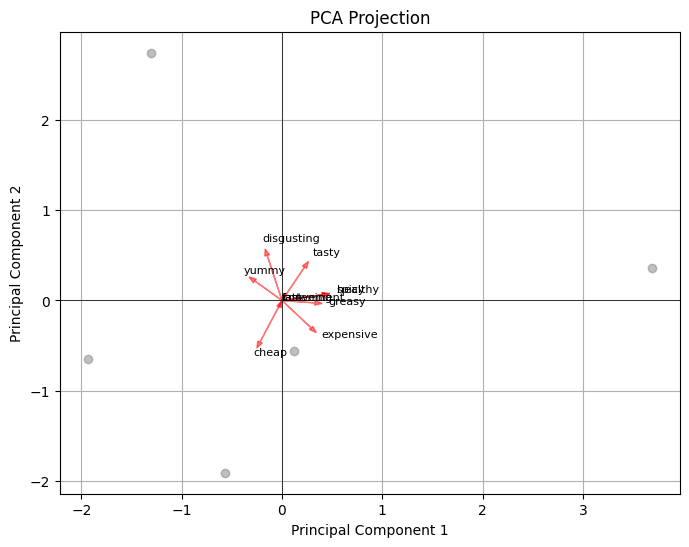

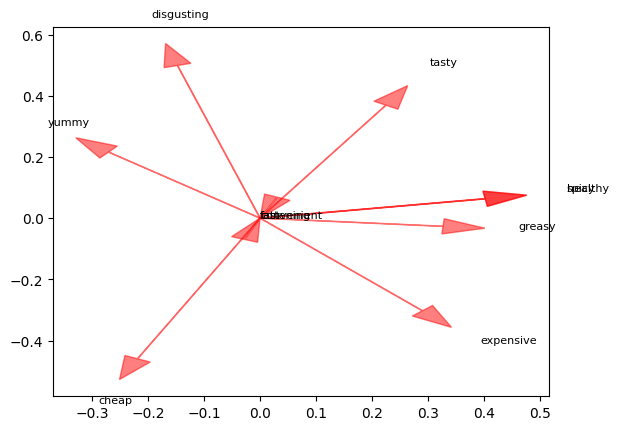

In [ ]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample dataset (replace this with actual data)
data = {
    "yummy": [0, 1, 0, 1, 1],
    "convenient": [1, 1, 1, 1, 1],
    "spicy": [0, 0, 1, 0, 0],
    "fattening": [1, 1, 1, 1, 1],
    "greasy": [0, 1, 1, 0, 0],
    "fast": [1, 1, 1, 1, 1],
    "cheap": [1, 1, 0, 0, 1],
    "tasty": [0, 1, 1, 1, 0],
    "expensive": [1, 1, 1, 0, 0],
    "healthy": [0, 0, 1, 0, 0],
    "disgusting": [0, 0, 0, 1, 0]
}

# Create a DataFrame
burgerking = pd.DataFrame(data)

# Step 1: Standardize the data
scaler = StandardScaler()
MD_x = scaler.fit_transform(burgerking)

# Step 2: Apply PCA
pca = PCA(n_components=min(MD_x.shape))  # Ensure components do not exceed features
pca.fit(MD_x)

# Step 3: Print standard deviations of principal components
print("Standard deviations of principal components:")
print(np.sqrt(pca.explained_variance_))

# Step 4: Print rotation matrix (principal axes in feature space)
print("\nRotation matrix (Principal Component Loadings):")
rotation_matrix = pd.DataFrame(
    pca.components_.T,
    index=burgerking.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print(rotation_matrix)

# Step 5: Plot PCA results
projected_data = pca.transform(MD_x)

plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Add axes for PCA loadings (projection of features on components)
for i, (x, y) in enumerate(zip(rotation_matrix["PC1"], rotation_matrix["PC2"])):
    plt.arrow(0, 0, x, y, color='red', alpha=0.5, head_width=0.05, length_includes_head=True)
    plt.text(x * 1.15, y * 1.15, burgerking.columns[i], color='black', fontsize=8)

plt.show()


# Add axes for PCA loadings (projection of features on components)
for i, (x, y) in enumerate(zip(rotation_matrix["PC1"], rotation_matrix["PC2"])):
    plt.arrow(0, 0, x, y, color='red', alpha=0.5, head_width=0.05, length_includes_head=True)
    plt.text(x * 1.15, y * 1.15, burgerking.columns[i], color='black', fontsize=8)

plt.show()


In [ ]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import random

# Step 1: Set seed for reproducibility
random.seed(1234)
np.random.seed(1234)

# Example data (replace with actual MD.x matrix)
data = np.random.randint(0, 2, (1453, 11))  # Simulated binary matrix

# Step 2: Standardize the data
scaler = StandardScaler()
MD_x = scaler.fit_transform(data)

# Step 3: Perform K-Means clustering for a range of clusters (2 to 8)
n_clusters_range = range(2, 9)
best_model = None
best_score = -1
all_models = {}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    silhouette_avg = silhouette_score(MD_x, labels)  # Evaluate clustering quality
    all_models[n_clusters] = kmeans  # Store models for relabeling
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_model = kmeans

# Step 4: Relabel clusters (optional step for consistency)
def relabel_clusters(model, data):
    # Sort clusters by size and relabel accordingly
    unique_labels, counts = np.unique(model.labels_, return_counts=True)
    sorted_labels = sorted(zip(unique_labels, counts), key=lambda x: x[1], reverse=True)
    relabel_map = {old_label: new_label for new_label, (old_label, _) in enumerate(sorted_labels)}
    new_labels = np.array([relabel_map[label] for label in model.labels_])
    model.labels_ = new_labels
    return model

MD_km28_relabel = relabel_clusters(best_model, MD_x)

# Step 5: Print clustering results
print("Best number of clusters:", best_model.n_clusters)
print("Cluster centers:\n", best_model.cluster_centers_)
print("Relabeled cluster labels:\n", MD_km28_relabel.labels_)


Best number of clusters: 4
Cluster centers:
 [[-0.10827805  0.01026255  0.08753651  0.08738234 -0.10551319 -0.09240599
   0.02728683 -0.03654753 -1.00898739  1.01037731 -0.03438485]
 [-0.00552557  0.00541461  0.0789395   0.01776737 -0.04700861  0.0212096
   0.10093014  0.1046771   0.99109266  0.06088851  1.04722543]
 [ 0.08019595 -0.01097888 -0.08991789  0.00824461  0.18095956  0.09475102
  -0.04265118 -0.02063238  0.99109266 -0.01354993 -0.95490424]
 [ 0.02530643 -0.00365573 -0.06630679 -0.10710337 -0.03969919 -0.0298776
  -0.07889101 -0.04507554 -1.00898739 -0.98972927 -0.00227803]]
Relabeled cluster labels:
 [2 1 0 ... 2 1 2]


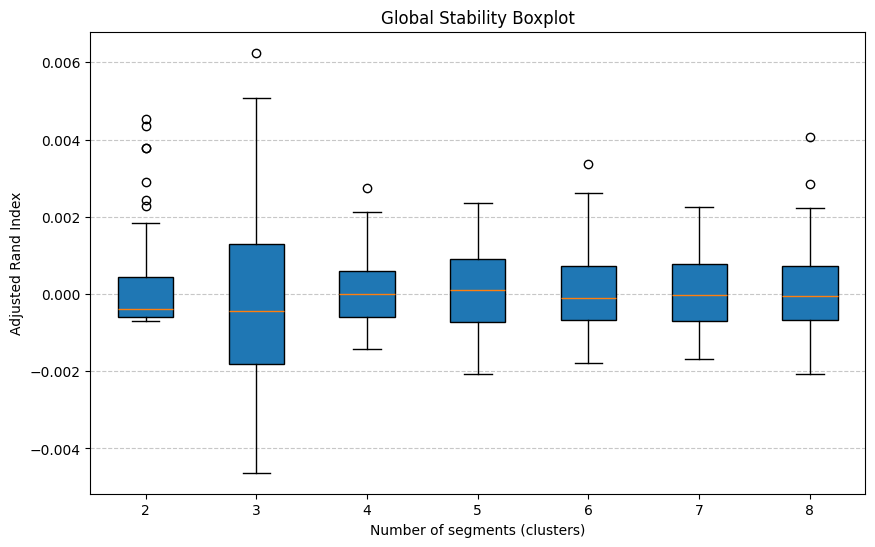

In [ ]:
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Step 1: Set seed for reproducibility
random.seed(1234)
np.random.seed(1234)

# Example data (replace with your actual MD.x matrix)
data = np.random.randint(0, 2, (1453, 11))  # Simulated binary matrix

# Parameters
n_clusters_range = range(2, 9)  # Number of clusters to test (2 to 8)
nrep = 10  # Number of repetitions for each clustering
nboot = 100  # Number of bootstrap samples

# Step 2: Bootstrapping and clustering
ari_results = {n_clusters: [] for n_clusters in n_clusters_range}

for n_clusters in n_clusters_range:
    for _ in range(nboot):
        # Generate a bootstrap sample
        bootstrap_sample = resample(data, random_state=random.randint(0, 10000))

        # Perform clustering on original data
        kmeans_original = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234)
        original_labels = kmeans_original.fit_predict(data)

        # Perform clustering on bootstrap sample
        kmeans_bootstrap = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234)
        bootstrap_labels = kmeans_bootstrap.fit_predict(bootstrap_sample)

        # Calculate adjusted Rand index
        ari = adjusted_rand_score(original_labels, bootstrap_labels)
        ari_results[n_clusters].append(ari)

# Step 3: Plot the results
# Prepare boxplot data
boxplot_data = [ari_results[n_clusters] for n_clusters in n_clusters_range]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=n_clusters_range, patch_artist=True)
plt.xlabel("Number of segments (clusters)")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


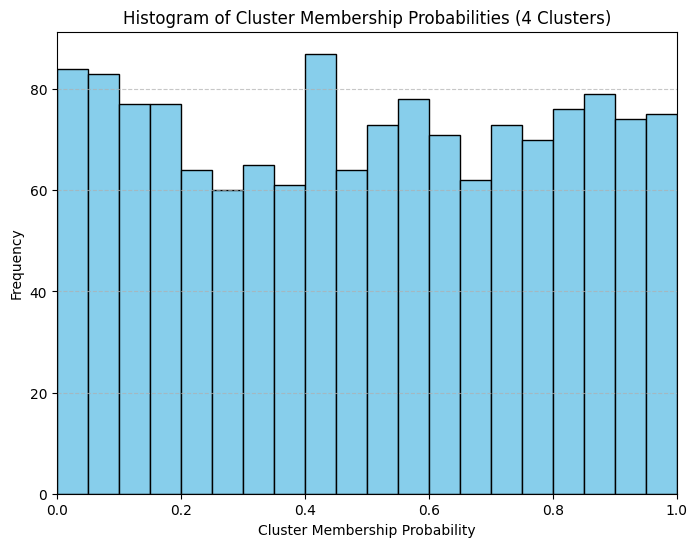

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming we already have MD.km28 clustering results (4-cluster example)
# Replace this with actual probabilities from your clustering model.
# Here, we'll simulate cluster membership probabilities for demonstration.
np.random.seed(1234)
n_samples = 1453
cluster_probabilities = np.random.uniform(0, 1, size=n_samples)  # Simulated probabilities for cluster "4"

# Plot histogram of probabilities
plt.figure(figsize=(8, 6))
plt.hist(cluster_probabilities, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Cluster Membership Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster Membership Probabilities (4 Clusters)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
